In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
class WinCondition:
    def __init__(self, board=[[[]]], size=4):
        self.win_player = "X"
        self.board = board
        self.size = size

    def check_win(self):
        layers = self.check_all_layers()
        z_check = self.check_all_z()
        diag = self.check_cross_diagonals() or self.check_all_vertical_diagonals()

        return diag or z_check or layers

    def check_all_layers(self):
        return any(self.check_layer(z) for z in range(self.size))

    def check_all_z(self):
        return any(self.check_z(x, y) for x in range(self.size) for y in range(self.size))

    def check_all_vertical_diagonals(self):
        xdiag = any(self.check_vertical_xdiagonals(x) for x in range(self.size))
        ydiag = any(self.check_vertical_ydiagonals(y) for y in range(self.size))

        return xdiag or ydiag

    def check_layer(self, z):
        print(z)
        x_checker = any(self.check_x(y, z) for y in range(self.size))
        y_checker = any(self.check_y(x, z) for x in range(self.size))
        diag_checker = self.check_diagonals(z)

        return x_checker or y_checker or diag_checker

    def check_cross_diagonals(self):
        first = all(self.board[c][c][c] == self.win_player for c in range(self.size))
        second = all(self.board[c][(self.size-1) - c][(self.size-1) - c] == self.win_player for c in range(self.size))
        third = all(self.board[c][c][(self.size-1) - c] == self.win_player for c in range(self.size))
        fourth = all(self.board[c][(self.size-1) - c][c] == self.win_player for c in range(self.size))

        return first or second or third or fourth

    def check_x(self, y, z):
        return all(self.board[x][y][z] == self.win_player for x in range(self.size))

    def check_y(self, x, z):
        return all(self.board[x][y][z] == self.win_player for y in range(self.size))

    def check_diagonals(self, z):
        if all(self.board[diag][diag][z] == self.win_player for diag in range(self.size)):
            return True

        if all(
            self.board[(self.size-1) - reverse_diag][reverse_diag][z] == self.win_player
            for reverse_diag in range(self.size)
        ):
            return True

        return False

    def check_z(self, x, y):
        return all(self.board[x][y][z] == self.win_player for z in range(self.size))

    def check_vertical_xdiagonals(self, x):
        if all(self.board[x][diag][diag] == self.win_player for diag in range(self.size)):
            return True

        if all(
            self.board[x][reverse_diag][(self.size-1) - reverse_diag] == self.win_player
            for reverse_diag in range(self.size)
        ):
            return True

        return False

    def check_vertical_ydiagonals(self, y):
        if all(self.board[diag][y][diag] == self.win_player for diag in range(self.size)):
            return True

        if all(
            self.board[reverse_diag][y][(self.size-1) - reverse_diag] == self.win_player
            for reverse_diag in range(self.size)
        ):
            return True

        return False


In [36]:
class TicTacToe3D(WinCondition):
    def __init__(self, render_mode="computer", size=4):
        # 3D board: 4 layers of 4x4 grids
        super().__init__()
        self.size=size
        self.board = [[[" " for _ in range(self.size)] for _ in range(self.size)] for _ in range(self.size)]
        self.current_player = "X"
        self.players = ["X", "O"]
        self.terminated = False
        self.winner = " "
        self.render_mode = render_mode

    def check_draw(self):
        # Check for any empty space in the entire 3D board
        return not any(
            " " in self.board[x][y][z]
            for x in range(self.size)
            for y in range(self.size)
            for z in range(self.size)
        )

    def get_action_space(self):
        action_space = []
        for x in range(self.size):
            for y in range(self.size):
                for z in range(self.size):
                    if self.board[x][y][z] == " ":
                        action_space.append(self.get_position(x, y, z))

        action_space.sort()
        return action_space

    def print_board(self):
        # Prints each layer of the 3D board
        for layer in range(self.size):
            print(f"Layer {layer + 1}:")
            print("┌───┬───┬───┬───┐")
            for i, row in enumerate(self.board[layer]):
                print("│ " + " │ ".join(row) + " │")
                if i < self.size-1:
                    print("├───┼───┼───┼───┤")
            print("└───┴───┴───┴───┘")
            if layer < self.size-1:
                print()

    def create_visualization(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        for x in range(self.size):
            for y in range(self.size):
                for z in range(self.size):
                    if self.board[x][y][z] == "X":
                        ax.scatter(x, y, z, color="r", marker="o")
                    if self.board[x][y][z] == "O":
                        ax.scatter(x, y, z, color="b", marker="o")

        cmin = 0
        cmax = self.size-1

        ax.set_xticks(np.arange(cmin, cmax + 1, 1))
        ax.set_yticks(np.arange(cmin, cmax + 1, 1))
        ax.set_zticks(np.arange(cmin, cmax + 1, 1))

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        if self.winner != " ":
            plt.title(f"Player {self.winner} Won!")
        else:
            plt.title(f"Player {self.current_player} Turn")

        plt.show()

    def change_player(self):
        if self.current_player == "X":
            self.current_player = "O"
        else:
            self.current_player = "X"

    def get_coordinates(self, position):
        x = int((position % (self.size**2) ) % self.size)
        y = int((position % (self.size**2) ) / self.size)
        z = int(position / (self.size**2) )

        return x, y, z

    def get_position(self, x, y, z):
        return z * (self.size)**2 + y * self.size + x

    def update_board(self, x, y, z):
        reward = 0

        if self.terminated:
            return self.board, reward, self.terminated, self.current_player

        if self.board[x][y][z] == " ":
            self.board[x][y][z] = self.current_player
        else:
            self.terminated = True
            return self.board, reward, self.terminated, self.current_player

        self.win_player = self.current_player
        win = self.check_win()
        draw = self.check_draw()

        self.terminated = win or draw

        if win:
            if self.current_player == "X":
                reward = -1
                self.winner = "X"
            else:
                reward = 1
                self.winner = "O"
        elif draw:
            reward = 0

        self.change_player()

        return self.board, reward, self.terminated, self.current_player

    def step_coordinates(self, x, y, z):
        # Output: Observation, reward, terminated, player_turn
        observation, reward, terminated, player_turn = self.update_board(x, y, z)

        if self.render_mode == "human":
            self.create_visualization()

        return observation, reward, terminated, player_turn

    def step(self, position):
        # Output: Observation, reward, terminated, player_turn
        x, y, z = self.get_coordinates(position)
        observation, reward, terminated, player_turn = self.update_board(x, y, z)

        if self.render_mode == "human":
            self.create_visualization()

        return observation, reward, terminated, player_turn

In [37]:
env = TicTacToe3D(size=3, render_mode="human")

In [22]:
env.board[0][0][0]

' '

In [38]:
env.size

3

0
1
2


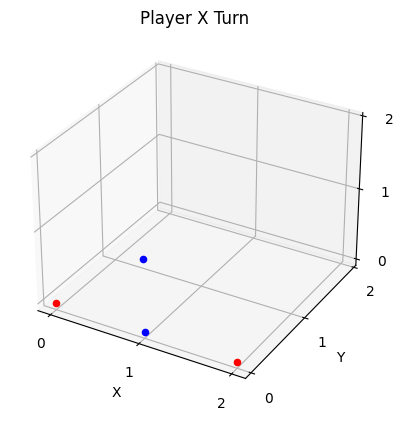

([[['X', ' ', ' '], [' ', ' ', ' '], [' ', ' ', ' ']],
  [['O', 'O', ' '], [' ', ' ', ' '], [' ', ' ', ' ']],
  [['X', ' ', ' '], [' ', ' ', ' '], [' ', ' ', ' ']]],
 0,
 False,
 'X')

In [42]:
env.step(10)

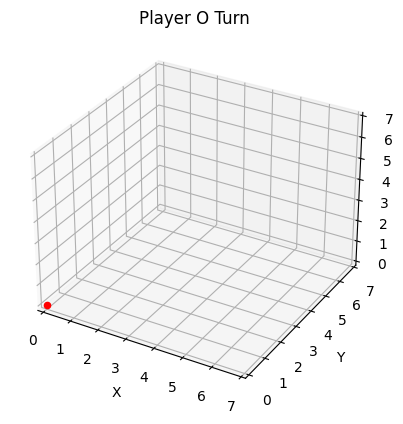

In [11]:
observation, reward, terminated, player_turn = env.step_coordinates(0, 0, 0)